In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data_dir = "../data/squad/"

Data Analysis: Paragraph lengths
====
We need to know what values to put for maximum context length and maximum question length. Hence we have a short look at the data


In [2]:
question_filename = data_dir + "train.ids.question"
question_val_filename = data_dir + "val.ids.question"
context_filename = data_dir + "train.ids.context"
context_val_filename = data_dir + "val.ids.context"

In [3]:
def len_histo(filename,cut=None):
    with open(filename, 'r') as f:
        lines=f.readlines()
    lines = [line.split() for line in lines] # each line contains a list of words, corresponding e.g. to the context
    len_lines=[len(line) for line in lines]
    n, bins, patches = plt.hist(len_lines, 50, normed=1, facecolor='green', alpha=0.75)
    print("min_length={}, max_length={}".format(min(len_lines),max(len_lines)))
    if cut is not None:
        ratio=len([x for x in len_lines if x<cut])/len(len_lines)
        print("ratio when cut: {}".format(ratio))

min_length=1, max_length=60
ratio when cut: 0.9989555943282629


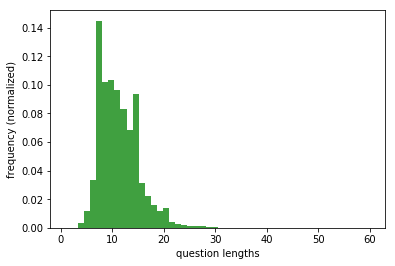

In [4]:
len_histo(question_filename,cut=30)
plt.xlabel("question lengths")
plt.ylabel("frequency (normalized)")
#plot suggests that we can cut at 30 (99.8956% of the data has length < 30). I we want all, we need to cut at 60

min_length=22, max_length=766
ratio when cut: 0.998046347037574


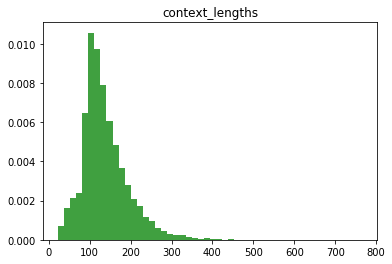

In [5]:
len_histo(context_filename, cut=400)
plt.title("context_lengths")
#plot suggests that we can cut at 400 (99.8% of the data has length < 400). I we want all, we need to cut at 766

min_length=4, max_length=30
ratio when cut: 0.9997665732959851


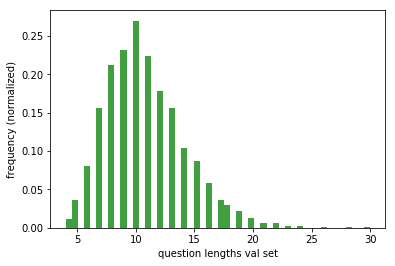

In [6]:
len_histo(question_val_filename,cut=30)
plt.xlabel("question lengths val set")
plt.ylabel("frequency (normalized)")
#plot suggests that we can cut at 30 (99.977% of the data has length < 30). I we want all, we need to cut at 60

min_length=78, max_length=499
ratio when cut: 0.9971988795518207


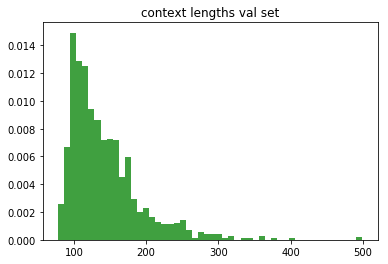

In [7]:
len_histo(context_val_filename, cut=400)
plt.title("context lengths val set")
#plot suggests that we can cut at 400 (99.7% of the data has length < 400). I we want all, we need to cut at 766

Data Analysis: Corrupt data
====
Looking at the train.span file, we can see some cases, where no valid span is given:


min_length=-2.0, max_length=45.0


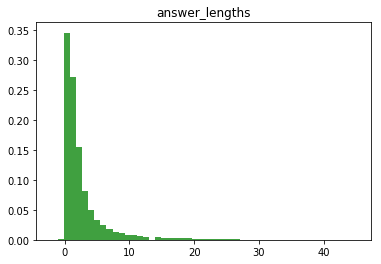

In [8]:
d=np.loadtxt(data_dir + "train.span")
answer_length = d[:,1]-d[:,0]
n, bins, patches = plt.hist(answer_length, 50, normed=1, facecolor='green', alpha=0.75)
print("min_length={}, max_length={}".format(min(answer_length),max(answer_length)))
plt.title("answer_lengths")

In [9]:
np.where(d[:,1]<d[:,0]) # in these cases, the generation of id's fails

(array([ 1802,  2858,  4323,  4954,  6478,  6672,  7342,  7406,  8159,
         8650,  9207, 18167, 18276, 21975, 24505, 25808, 26453, 26689,
        26997, 27618, 27709, 30861, 31000, 34618, 35417, 35555, 36834,
        37054, 39622, 40204, 42874, 44988, 45804, 47301, 49219, 50591,
        50713, 51622, 51672, 51676, 56327, 58202, 60922, 62170, 63808,
        64212, 64337, 66971, 67253, 70787, 73841, 74088, 74278, 75072,
        76004, 78799, 79147, 79837]),)

In [10]:
n_answers=len(d)
n_corrupt_answers=len(np.where(d[:,1]<d[:,0])[0])
print("n_answers={}\nn_corrupt_answers={}\nn_corrupt_answers/n_answers={}".format(
    n_answers,n_corrupt_answers,n_corrupt_answers/n_answers))
# the number of corrupt answers is negligible for now

n_answers=81386
n_corrupt_answers=58
n_corrupt_answers/n_answers=0.0007126532818912344
